# Using the Pandas Python Data Toolkit

Today we will highlight some very useful and cool features of the Pandas library in Python while playing with some nematode worm behaviour data collected from the multi-worm-tracker (Swierczek et al., 2011).  

Specifically, we will explore:
    1. Loading data
    2. Dataframe data structures
    3. Element-wise mathematics
    4. Working with time series data
    5. Groupby operations
    6. Quick and easy visualization

## Some initial setup

In [6]:
## load libraries
%matplotlib inline
import pandas as pd
import numpy as np

from pandas import set_option
set_option("display.max_rows", 4)

## magic to time cells in ipython notebook
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

Installed autotime.py. To use it, type:
  %load_ext autotime
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.86 s


## 1. Loading data from a local text file

More details, see http://pandas.pydata.org/pandas-docs/stable/io.html

Let's first load some behaviour data from a collection of wild-type worms.

In [36]:
filename = 'data/behav_2.dat'
behav = pd.read_table(filename, sep = '\s+')
behav

,date,plate,time,strain,frame,ID,persistance,area,speed,angularspeed,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
0,20141118,20141118_131037,15.028,wild-type,0,1,234.9,0.096228,NaN,NaN,...,1,0.000,38.2,0,29.0036,29.4805,NaN,NaN,103.3,NaN
1,20141118,20141118_131037,15.069,wild-type,1,1,234.9,0.096957,NaN,NaN,...,1,0.010,32.7,0,29.0076,29.4713,NaN,NaN,103.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507152,20141118,20141118_133214,249.938,mutant_1,5840,87,24.3,0.106434,NaN,NaN,...,0,2.941,23.6,0,35.8461,22.6167,NaN,NaN,139.7,NaN
507153,20141118,20141118_133214,249.977,mutant_1,5841,87,24.3,0.107163,NaN,NaN,...,0,2.941,23.7,0,35.8462,22.6168,NaN,NaN,139.8,NaN


time: 3.56 s


## 2. Dataframe data structures

For more details, see http://pandas.pydata.org/pandas-docs/stable/dsintro.html

Pandas provides access to data frame data structures. These tabular data objects allow you to mix and match arrays of different data types in one "table".

In [37]:
print(behav.dtypes)

date        int64
plate      object
           ...   
orient    float64
crab      float64
dtype: object
time: 4.65 ms


## 3. Accessing data in a Pandas dataframe

How to you access data in Pandas? There are at least two ways, the first uses column names and is very similar to how this is done in R, and the second uses the attribute `.iloc` which allows you to slice similar to lists and numpy.

Here is how to access a column, for example the speed column:

In [38]:
behav['morphwidth']

0         0.0897
1         0.0872
           ...  
507152    0.1096
507153    0.1106
Name: morphwidth, dtype: float64

time: 46.1 ms


When we access only a single column in pandas, it is no longer of type dataframe, but of type series:

In [39]:
type(behav['morphwidth'])

pandas.core.series.Series

time: 2.51 ms


To access multiple columns this way we would do the following:

In [40]:
behav[['strain', 'morphwidth']]

,strain,morphwidth
0,wild-type,0.0897
1,wild-type,0.0872
...,...,...
507152,mutant_1,0.1096
507153,mutant_1,0.1106


time: 21.8 ms


You can use this notation to apply functions to certain columns, for example, how many unique values in strain are there?

In [41]:
set(behav['strain'])

{'mutant_1', 'wild-type'}

time: 25.9 ms


In certain situations you may want to index via column number, you can do this as follows:

In [43]:
# access the 3rd column called strain
behav.iloc[:,3]

0         wild-type
1         wild-type
            ...    
507152     mutant_1
507153     mutant_1
Name: strain, dtype: object

time: 5.82 ms


You can use this to access only a subset of the rows as well, for example the first 10 rows for columns 2 & 3: 

In [45]:
behav.iloc[:10,2:4]

,time,strain
0,15.028,wild-type
1,15.069,wild-type
...,...,...
8,15.350,wild-type
9,15.387,wild-type


time: 26.9 ms


## 4. Element-wise mathematics

Suppose we want to add a new column that is a combination of two columns in our dataset. Similar to `numpy`, `Pandas` lets us do this easily and deals with doing math between columns on an element by element basis. For example, We are interested in the ratio of the midline length divided by the morphwidth to look at whether worms are crawling in a straight line or curling back on themselves (*e.g.,* during a turn).

In [20]:
## vectorization takes 49.3 ms
behav['mid_width_ratio'] = behav['morphwidth']/behav['midline']
behav[['morphwidth', 'midline', 'mid_width_ratio']].head()

,morphwidth,midline,mid_width_ratio
0,1,12.1,0.082645
1,1,5.9,0.169492
...,...,...,...
3,1,14.9,0.067114
4,1,6.3,0.158730


time: 59.8 ms


In [ ]:
## looping takes 1 min 44s
mid_width_ratio = np.empty(len(behav['morphwidth']), dtype='float64')

for i in range(1,len(behav['morphwidth'])):
    mid_width_ratio[i] =+ behav.loc[i,'morphwidth']/behav.loc[i,'midline']
    
behav['mid_width_ratio'] = mid_width_ratio
behav[['morphwidth', 'midline', 'mid_width_ratio']].head()

Now that we have changed the dataset, we might want to write these changes to a file. We will do this with the `to_csv` function:

In [139]:
behav.to_csv('data/behav_morph_width_ratio.csv', sep=',')

time: 17.9 s


### `apply()`
For more details, see: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

Another bonus about using Pandas is the `apply` function - this allows you to apply any function to a select column(s) or row(s) of a dataframe, or accross the entire dataframe.

In [21]:
## custom function to center data
def center(data):
    return data - data.mean()

time: 2.52 ms


In [22]:
## center all data on a column basis
behav.iloc[:,4:].apply(center).head()

,area,speed,angular_speed,aspect,midline,morphwidth,kink,bias,pathlength,mid_width_ratio
0,-0.002280,0.249039,-6.313001,-0.219804,11.004384,0.904059,-43.962917,NaN,NaN,-0.029877
1,-0.002280,0.249039,-6.320601,-0.220104,4.804384,0.904059,-43.955917,NaN,NaN,0.056970
...,...,...,...,...,...,...,...,...,...,...
3,-0.000093,0.229039,-6.279701,-0.220304,13.804384,0.904059,-43.942917,NaN,NaN,-0.045408
4,0.000636,0.221039,-6.257501,-0.217504,5.204384,0.904059,-43.935917,NaN,NaN,0.046208


time: 58.4 ms


## 5. Working with time series data

### Indices
For more details, see http://pandas.pydata.org/pandas-docs/stable/indexing.html

Given that this is time series data we will want to set the index to time, we can do this while we read in the data.

In [57]:
behav = pd.read_table(filename, sep = '\s+', index_col='time')
behav

,date,plate,strain,frame,ID,persistance,area,speed,angularspeed,length,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
time,,,,,,,,,,,,,,,,,,,,,
15.028,20141118,20141118_131037,wild-type,0,1,234.9,0.096228,NaN,NaN,0.7560,...,1,0.000,38.2,0,29.0036,29.4805,NaN,NaN,103.3,NaN
15.069,20141118,20141118_131037,wild-type,1,1,234.9,0.096957,NaN,NaN,0.7803,...,1,0.010,32.7,0,29.0076,29.4713,NaN,NaN,103.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249.938,20141118,20141118_133214,mutant_1,5840,87,24.3,0.106434,NaN,NaN,0.9153,...,0,2.941,23.6,0,35.8461,22.6167,NaN,NaN,139.7,NaN
249.977,20141118,20141118_133214,mutant_1,5841,87,24.3,0.107163,NaN,NaN,0.9153,...,0,2.941,23.7,0,35.8462,22.6168,NaN,NaN,139.8,NaN


time: 3.78 s


To utilize functions built into Pandas to deal with time series data, let's convert our
time to a date time object using the `to_datetime()` function.

In [58]:
behav.index.dtype

dtype('float64')

time: 2.24 ms


In [60]:
behav.index = pd.to_datetime(behav.index, unit='s')
print(behav.index.dtype)

datetime64[ns]
time: 714 ms


In [61]:
behav

,date,plate,strain,frame,ID,persistance,area,speed,angularspeed,length,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
1970-01-01 00:00:15.028,20141118,20141118_131037,wild-type,0,1,234.9,0.096228,NaN,NaN,0.7560,...,1,0.000,38.2,0,29.0036,29.4805,NaN,NaN,103.3,NaN
1970-01-01 00:00:15.069,20141118,20141118_131037,wild-type,1,1,234.9,0.096957,NaN,NaN,0.7803,...,1,0.010,32.7,0,29.0076,29.4713,NaN,NaN,103.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:04:09.938,20141118,20141118_133214,mutant_1,5840,87,24.3,0.106434,NaN,NaN,0.9153,...,0,2.941,23.6,0,35.8461,22.6167,NaN,NaN,139.7,NaN
1970-01-01 00:04:09.977,20141118,20141118_133214,mutant_1,5841,87,24.3,0.107163,NaN,NaN,0.9153,...,0,2.941,23.7,0,35.8462,22.6168,NaN,NaN,139.8,NaN


time: 250 ms


Now that our index is of datetime object, we can use the resample function to get time intervals. With this function you can choose the time interval as well as how to downsample (mean, sum, *etc.*)

In [62]:
behav_resampled = behav.resample('10s', how=('mean'))
behav_resampled

,date,frame,ID,persistance,area,speed,angularspeed,length,rellength,width,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
1970-01-01 00:00:10,20141118,62.711085,13.864025,155.839342,0.089762,0.164503,8.433122,0.780019,1.014002,0.197847,...,0.952569,0.389527,28.552254,0.000624,23.978876,23.584906,0.012174,-0.024756,47.414245,0.013190
1970-01-01 00:00:20,20141118,249.180675,15.628123,153.852831,0.090508,0.155679,7.205397,0.792260,1.026839,0.192063,...,0.876174,1.423877,28.563552,0.002201,24.041254,23.072667,0.022262,-0.006205,41.538622,0.011724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:03:50,20141118,5458.693863,177.873863,150.224391,0.094090,0.109268,4.521180,0.819377,1.047367,0.176305,...,0.908607,7.674139,24.975206,0.001973,24.506425,24.095993,0.002343,0.013047,12.485120,0.006728
1970-01-01 00:04:00,20141118,5704.926108,175.989060,151.687085,0.093545,0.102982,4.329094,0.814193,1.038616,0.175390,...,0.829332,8.742751,24.785606,0.002309,24.863789,24.863597,0.004902,0.012062,3.551655,0.006358


time: 476 ms


This has reduced our dataset to a more manageable size, **but** we have lost the column `strain` because resample just combined all rows for every 10s. This is not exactly what we want to do because we want to compare these groups... We need to use another pandas function, `groupby` to allow us to keep this information.

## 6. Groupby operations

In this dataset we have 2 different worm strains, or groups. When it comes to analysis and/or plotting we likely want to act on these groups each independently. We can use the pandas `groupby()` function to help us do this:

In [63]:
# make a groupby object which groups by strains
grouped_behav = behav.groupby('strain')
type(grouped_behav)

pandas.core.groupby.DataFrameGroupBy

time: 2.95 ms


In [64]:
print(grouped_behav)

time: 1.53 ms


You can see that the groupby object we created isn't very useful on its own, but we can use it when we are acting on the dataframe to make sure the functions/methods we apply act on the groups, not the whole dataframe.

For example, if we now want to resample each group separately so we do not lose the strain information we can do the following:

In [66]:
resampled_groups = behav.groupby('strain').resample('10s', how=('mean'))
resampled_groups

ID  angularspeed      area    aspect  \
strain                                                                        
mutant_1  1970-01-01 00:00:10   14.166029      5.341250  0.084776  0.213143   
          1970-01-01 00:00:20   15.551754      5.557723  0.085505  0.218023   
...                                   ...           ...       ...       ...   
wild-type 1970-01-01 00:03:50  288.899770      5.980102  0.098288  0.248843   
          1970-01-01 00:04:00  287.499373      5.582613  0.098004  0.246534   

                                   bias      crab      curve      date  \
strain                                                                   
mutant_1  1970-01-01 00:00:10  0.944940  0.010161  25.515777  20141118   
          1970-01-01 00:00:20  0.887064  0.010114  26.195024  20141118   
...                                 ...       ...        ...       ...   
wild-type 1970-01-01 00:03:50  0.937489  0.008730  27.963539  20141118   
          1970-01-01 00:04:00  0.875750  0.008100  27.132316  20141118   

                                    dir        frame    ...        orient  \
strain                                                  ...                 
mutant_1  1970-01-01 00:00:10  0.000083    62.651573    ...     57.650553   
          1970-01-01 00:00:20  0.002584   248.706677    ...     50.283069   
...                                 ...          ...    ...           ...   
wild-type 1970-01-01 00:03:50  0.001735  5453.795268    ...      8.020835   
          1970-01-01 00:04:00  0.001426  5699.430874    ...     -5.885441   

                                pathlen  persistance  relaspect  rellength  \
strain                                                                       
mutant_1  1970-01-01 00:00:10  0.386367   162.409864   0.893754   1.029213   
          1970-01-01 00:00:20  1.433472   163.010681   0.907928   1.021623   
...                                 ...          ...        ...        ...   
wild-type 1970-01-01 00:03:50  7.559928   117.936149   0.942490   1.035555   
          1970-01-01 00:04:00  9.190967   119.019323   0.942170   1.026389   

                               relwidth     speed     vel_x     vel_y  \
strain                                                                  
mutant_1  1970-01-01 00:00:10  0.961974  0.163496 -0.008042 -0.023233   
          1970-01-01 00:00:20  0.970967  0.155818  0.002565 -0.014216   
...                                 ...       ...       ...       ...   
wild-type 1970-01-01 00:03:50  0.994018  0.125332  0.013883  0.025775   
          1970-01-01 00:04:00  0.982084  0.120613  0.014010  0.022929   

                                  width  
strain                                   
mutant_1  1970-01-01 00:00:10  0.167119  
          1970-01-01 00:00:20  0.169132  
...                                 ...  
wild-type 1970-01-01 00:03:50  0.200221  
          1970-01-01 00:04:00  0.197696  

[48 rows x 26 columns]

time: 643 ms


## 7. Quick and easy visualization
For more details, see: http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

To plot any of our columns with numerical measurements against time, we can use pandas built-in plot function:

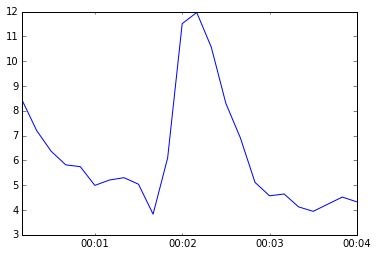

time: 194 ms


In [72]:
behav_resampled['angularspeed'].plot()

You can plot all of the columns:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114db0ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1164c2ba8>], dtype=object)

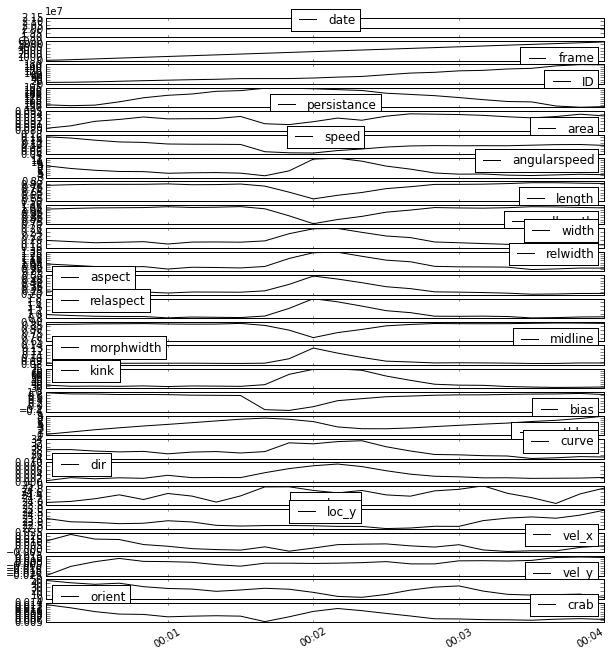

time: 5.03 s


In [73]:
behav_resampled.plot(subplots=True, figsize = (10, 12))

Or you can also plot a subset of the columns:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11671a6a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11cf8be48>], dtype=object)

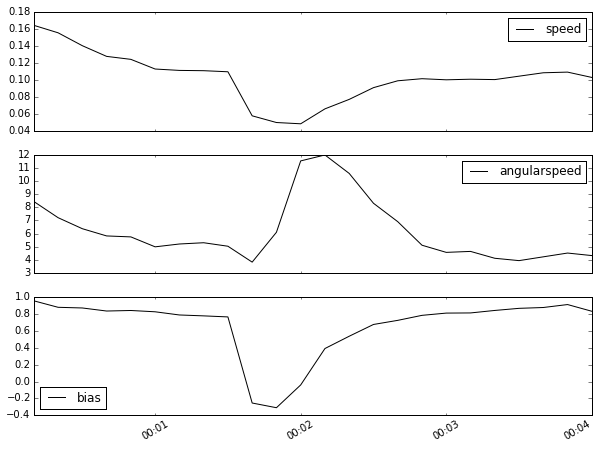

time: 569 ms


In [75]:
behav_resampled[['speed', 'angularspeed', 'bias']].plot(subplots = True, figsize = (10,8))

But notice we have been working with the ungrouped dataframe, can we do this with our grouped dataframe?

In [76]:
resampled_groups

ID  angularspeed      area    aspect  \
strain                                                                        
mutant_1  1970-01-01 00:00:10   14.166029      5.341250  0.084776  0.213143   
          1970-01-01 00:00:20   15.551754      5.557723  0.085505  0.218023   
...                                   ...           ...       ...       ...   
wild-type 1970-01-01 00:03:50  288.899770      5.980102  0.098288  0.248843   
          1970-01-01 00:04:00  287.499373      5.582613  0.098004  0.246534   

                                   bias      crab      curve      date  \
strain                                                                   
mutant_1  1970-01-01 00:00:10  0.944940  0.010161  25.515777  20141118   
          1970-01-01 00:00:20  0.887064  0.010114  26.195024  20141118   
...                                 ...       ...        ...       ...   
wild-type 1970-01-01 00:03:50  0.937489  0.008730  27.963539  20141118   
          1970-01-01 00:04:00  0.875750  0.008100  27.132316  20141118   

                                    dir        frame    ...        orient  \
strain                                                  ...                 
mutant_1  1970-01-01 00:00:10  0.000083    62.651573    ...     57.650553   
          1970-01-01 00:00:20  0.002584   248.706677    ...     50.283069   
...                                 ...          ...    ...           ...   
wild-type 1970-01-01 00:03:50  0.001735  5453.795268    ...      8.020835   
          1970-01-01 00:04:00  0.001426  5699.430874    ...     -5.885441   

                                pathlen  persistance  relaspect  rellength  \
strain                                                                       
mutant_1  1970-01-01 00:00:10  0.386367   162.409864   0.893754   1.029213   
          1970-01-01 00:00:20  1.433472   163.010681   0.907928   1.021623   
...                                 ...          ...        ...        ...   
wild-type 1970-01-01 00:03:50  7.559928   117.936149   0.942490   1.035555   
          1970-01-01 00:04:00  9.190967   119.019323   0.942170   1.026389   

                               relwidth     speed     vel_x     vel_y  \
strain                                                                  
mutant_1  1970-01-01 00:00:10  0.961974  0.163496 -0.008042 -0.023233   
          1970-01-01 00:00:20  0.970967  0.155818  0.002565 -0.014216   
...                                 ...       ...       ...       ...   
wild-type 1970-01-01 00:03:50  0.994018  0.125332  0.013883  0.025775   
          1970-01-01 00:04:00  0.982084  0.120613  0.014010  0.022929   

                                  width  
strain                                   
mutant_1  1970-01-01 00:00:10  0.167119  
          1970-01-01 00:00:20  0.169132  
...                                 ...  
wild-type 1970-01-01 00:03:50  0.200221  
          1970-01-01 00:04:00  0.197696  

[48 rows x 26 columns]

time: 45.7 ms


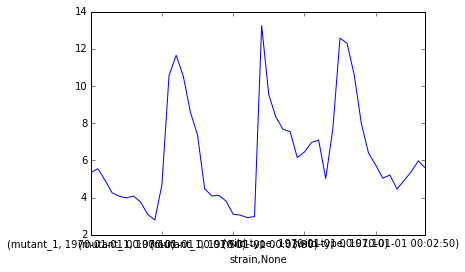

time: 195 ms


In [77]:
resampled_groups['angularspeed'].plot()

That doesn't look right... its plotting them on the same plot, but one after another and they are the same colour...

To plot a grouped data frame you need to loop over the groupby object and then resample and plot each group within the loop:

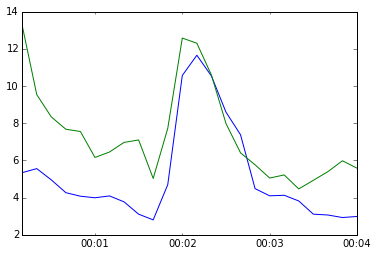

time: 583 ms


In [136]:
## loop over grouby object, and resample and plot each
for groups in grouped_behav:
    groups[1].resample('10s', how=('mean'))['angularspeed'].plot()    

## Summary

Pandas is a extremely useful and efficient tool for scientists, or anyone who needs to wrangle, analyze and visualize data!

#### Pandas is particularly attractive to scientists with minimal programming experience because:
* Strong, welcoming and growing community
* It is readable
* Idiom matches intuition

To learn more about Pandas see:
* [Pandas Documentation](http://pandas.pydata.org/)
* ipython notebook [tutorial](http://nsoontie.github.io/2015-03-05-ubc/novice/python/Pandas-Lesson.html) by Nancy Soontiens (Software Carpentry)
* Video [tutorial](https://www.youtube.com/watch?v=0CFFTJUZ2dc&list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu&index=12) from SciPy 2015 by Jonathan Rocher 
* [History of Pandas](https://www.youtube.com/watch?v=kHdkFyGCxiY) by Wes McKinney